## Analysing, preprocessing, and transforming language datasets  

### Introduction

Before we can use machine learning to understand or generate text, we need to take a closer look at the data itself. In this section, we’ll explore how to *analyse and prepare a language dataset* so that it’s clean, meaningful, and ready for modelling. This process is part of what’s called *Natural Language Processing (NLP)*—a branch of AI that helps computers work with human language.

Getting to know your data is a crucial first step in any NLP project. Without it, models can easily become confused by messy or inconsistent text, leading to poor results. The better prepared your data is, the better your model will perform. We’ll break the process into three main parts:

1. *Describing the dataset* – This means summarising what’s in the data. For example, we’ll count how often different words appear, how long the average sentence is, and how many unique words are used. We’ll also check for things like:
    - Are there missing pieces of text?
    - Are there very rare or unusual words?
    - How are characters and punctuation used?
  
    These checks help us understand the “shape” of the language we’re working with and whether anything looks off or needs fixing.

2. *Visualising the dataset* – It’s much easier to spot trends or problems when we *see* them. We’ll use simple charts and images to make the data more understandable. For instance:
    - *Word clouds* show the most frequent words by size.
    - *Bar charts* reveal how often certain words or sentence lengths appear.
    - *Histograms and line plots* help us see how different features (like sentence length or word frequency) are distributed.

    These visuals are especially helpful for spotting patterns you might miss when looking at raw text or tables.

When you complete this process, you’ll have a clear, structured way to explore, visualise, and prepare textual data. This gives you a solid foundation for any NLP project. When your data is clean, consistent, and well-understood, your models are far more likely to produce accurate, useful results.

### Understanding Language data

Before applying machine learning to text, it’s important to understand the structure and key properties of the dataset. This starts with reviewing the dataset’s *metadata*—high-level details that describe the overall content and organisation of the data without needing to read each document in full.

Examining this metadata gives us a clearer sense of what the dataset looks like. It reveals whether the data is balanced, whether text lengths vary a lot, and how complex the language is. This kind of overview guides our decisions about how to clean and transform the data later on.

Here are some important features to look at:

- *Text length* – This refers to how many characters or words are in each document. Some reviews might be short and to the point, while others are long and detailed. Understanding the variation in text length helps us decide whether we need to trim very long entries, filter out very short ones, or apply padding for consistency.

- *Number of tokens* – After splitting the text into words or subwords (a process called tokenisation), we can count how many tokens each document contains. This gives a better measure of text size and is especially useful for models that work with fixed input lengths.

- *Vocabulary size* – This is the number of unique words in the dataset. A large vocabulary can reflect rich language, but it might also include rare words, typos, or irrelevant noise. Knowing the vocabulary size helps when choosing whether to limit or filter terms in later processing steps.

- *Class distribution* – In classification tasks (such as sentiment analysis), it’s important to check how many examples there are in each category. If the dataset is heavily unbalanced (e.g. many more positive reviews than negative ones), it could lead to biased models that perform poorly on the underrepresented class.

Once we understand these characteristics, we can begin preparing the data for machine learning. We’ll focus on the following core steps to get the text ready for modelling:

- *Tokenisation* – Splitting sentences into individual words or subwords.
- *Vectorisation* – Converting words into numerical values using methods like TF-IDF (which weighs words by importance) or word embeddings (which capture meaning and similarity).
- *Other transformations* – These may include removing common stopwords, converting all text to lowercase, or applying lemmatisation to reduce words to their root form.

### Installing Python libraries

In [2]:
%pip install nltk pandas matplotlib wordcloud seaborn scikit-learn -q

Note: you may need to restart the kernel to use updated packages.


### Downloading the dataset


In [1]:
import urllib.request
import tarfile
import os

# IMDb dataset URL
# url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" # Size 80.2MB
url = "http://www.cs.cornell.edu/people/pabo/movie-review-data/mix20_rand700_tokens_0211.tar.gz" # Size 2.2MB

# Download the dataset to the current directory
urllib.request.urlretrieve(url, "aclImdb_v1.tar.gz") 

# Unpack (extract) the dataset
with tarfile.open("aclImdb_v1.tar.gz", "r:gz") as tar:
    tar.extractall()


### Loading the dataset

The code below, loads a sentiment analysis dataset of movie reviews from two directories, `./pos` and `./neg`, where positive reviews are assigned the label `'pos'` and negative reviews the label `'neg'`:

```
tokens/
  ├── neg/
  │    ├── cv000_tok-29416.txt
  │    ├── cv001_tok-19502.txt
  │    ...
  └── pos/
       ├── cv000_tok-29590.txt
       ├── cv001_tok-18431.txt
       ...
```

It reads each review file, extracts its text content, and stores it in a list along with the corresponding label.

 Finally, it combines both lists into a Pandas DataFrame with two columns: `text` (containing the review content) and `label` (indicating sentiment), allowing for further analysis and preprocessing.

In [5]:
import os  # For navigating the file system
import pandas as pd  # For working with tabular data

# Define the root directory where the review text files are stored
root_dir = './tokens'

# Define the paths to the positive and negative review folders
pos_path = root_dir + '/pos'
neg_path = root_dir + '/neg'

# Load positive review files
pos_reviews = []  # List to store (text, label) tuples for positive reviews

# Loop through all files in the positive reviews folder
for file in os.listdir(pos_path):
    # Open and read each file, then append its contents and label to the list
    with open(os.path.join(pos_path, file), 'r', encoding='latin-1') as f:
        pos_reviews.append((f.read(), 'pos'))
# Load negative review files
neg_reviews = []  # List to store (text, label) tuples for negative reviews

# Loop through all files in the negative reviews folder
for file in os.listdir(neg_path):
    # Open and read each file, then append its contents and label to the list
    with open(os.path.join(neg_path, file), 'r', encoding='latin-1') as f:
        neg_reviews.append((f.read(), 'neg'))

# Combine positive and negative reviews into one dataset with columns: 'text' and 'label'
data = pd.DataFrame(pos_reviews + neg_reviews, columns=['text', 'label'])

# Print the number of rows and columns in the dataset (rows = reviews, columns = text + label)
print(data.shape)

# Display the first few rows of the dataset
data.head()


(1386, 2)


,text,label
0,"the farrelly brothers' third film , after dumb...",pos
1,more movie views by jamey hughton at : http : ...,pos
2,if chris farley had strapped some fake mutton-...,pos
3,"in zoolander , the world's most successful , i...",pos
4,if the current trends of hollywood filmmaking ...,pos


#### Tokenise the data

Tokenisation is one of the first and most important steps in processing text for machine learning. It involves breaking the text down into smaller pieces—usually *words* or *subwords*—so that a computer can work with them more easily.

Computers don’t naturally understand sentences the way we do. For example, when we read the sentence:

> *"The film was surprisingly good."*

we instantly recognise the individual words and their meanings. But to a machine, this is just a long string of characters. Tokenisation splits that string into meaningful units like:

> `["the", "film", "was", "surprisingly", "good"]`

Each of these tokens (in this case, words) can then be analysed on its own.

Tokenisation helps us prepare the text for further steps such as:
- *Stopword removal* – getting rid of very common words like “the” or “is” that don’t carry much meaning
- *Stemming or lemmatisation* – reducing words to their base form (e.g. “running” becomes “run”)
- *Vectorisation* – turning words into numbers so that a machine learning model can process them

Without tokenisation, none of these steps would work properly, because the model wouldn’t know where one word ends and the next begins.

It also allows us to:
- Count how many words are in a document  
- Look at word frequency  
- Analyse sentence structure and word patterns

Tokenisation lays the foundation for nearly everything that follows in an NLP pipeline. When this step is done well, it makes all the other transformations easier and more reliable:

In [6]:
import re

# Define a simple word tokenizer using regex
def regex_tokeniser(text):
    return re.findall(r'\b\w+\b', str(text).lower())  # Extract words and convert to lowercase

# Apply regex tokenisation using list comprehension
data['tokens'] = [regex_tokeniser(text) for text in data['text']]

# Display the first few rows
data.head()

,text,label,tokens
0,"the farrelly brothers' third film , after dumb...",pos,"[the, farrelly, brothers, third, film, after, ..."
1,more movie views by jamey hughton at : http : ...,pos,"[more, movie, views, by, jamey, hughton, at, h..."
2,if chris farley had strapped some fake mutton-...,pos,"[if, chris, farley, had, strapped, some, fake,..."
3,"in zoolander , the world's most successful , i...",pos,"[in, zoolander, the, world, s, most, successfu..."
4,if the current trends of hollywood filmmaking ...,pos,"[if, the, current, trends, of, hollywood, film..."


### Word frequency analysis

Word frequency analysis is one of the most basic—but also most powerful—techniques in Natural Language Processing (NLP). It helps us find out which words appear most often in a collection of texts.

At first glance, this might seem simple, but counting words can reveal a lot about the dataset. It gives us a clear picture of the language used, the topics discussed, and even the tone or mood of the texts.

This analysis is useful for several reasons:

- *Identifying keywords*: Frequently used words can help us understand what the texts are mostly about. For example, in movie reviews, words like *"plot"*, *"performance"*, or *"director"* might appear often.
- *Detecting common stopwords*: Words such as *"the"*, *"is"*, *"and"*, or *"to"* usually appear a lot but don’t carry much meaning. Word frequency analysis helps us find and later remove these so we can focus on more meaningful words.
- *Understanding word distribution*: Some words might appear much more in one type of text than another (e.g. *"boring"* in negative reviews and *"brilliant"* in positive ones). This helps us choose features that are useful for training models.
- *Spotting trends or patterns*: We might see that certain words come up more frequently in texts from a particular category, which gives clues about sentiment, themes, or writing style.

For example, in a dataset of product reviews, frequent words like *"delivery"*, *"quality"*, or *"price"* suggest what customers tend to comment on most.

Looking at word frequency is one of the first steps in understanding how people express themselves in a dataset—and it often shapes how we clean and prepare the data for modelling. It’s a simple tool that can provide surprisingly deep insights:

In [7]:
from collections import Counter

# Flatten the list of tokenized words and ensure lowercase
all_words = [word.lower() for tokens in data['tokens'] for word in tokens]

# Count the occurrences of each word
word_counts = Counter(all_words)

# Display the 10 most common words
print("Most common words:", word_counts.most_common(10))


Most common words: [('the', 51033), ('a', 26070), ('and', 24524), ('of', 23021), ('to', 21154), ('is', 16883), ('in', 14854), ('s', 12959), ('it', 10794), ('that', 10477)]


Why is this Important? Well, it allows us to identify dominant themes in the dataset. It also helps in stopword removal, since common words like "the" and "is" might not be useful for NLP tasks. And we can use it for feature selection in text classification models!

### Word Cloud

A *Word Cloud* (also known as a *tag cloud*) is a simple but powerful way to visualise the most frequently used words in a collection of text. In this kind of visual, the size of each word reflects how often it appears in the dataset—the more frequent the word, the larger and bolder it looks.

This makes Word Clouds a quick and intuitive way to:
- *Spot dominant terms* in your data  
- *Understand the overall theme* or topic of a collection of texts  
- *Identify common patterns* in different groups, such as positive vs. negative reviews  

For example, if you’re analysing restaurant reviews, a Word Cloud might show large words like *“service”*, *“delicious”*, or *“waiting”*, giving you an instant sense of what people talk about most.

Word Clouds are popular in Natural Language Processing (NLP) because they offer:
- *A clear summary of text content* at a glance  
- *A visual starting point* for deeper analysis (e.g. filtering, modelling, or feature selection)  
- *An engaging way to communicate results* to others, especially in presentations or reports  

They’re especially useful in tasks like sentiment analysis, keyword extraction, and topic modelling, where understanding which words dominate the text is key.

While they’re not a detailed analytical tool on their own, Word Clouds are a great way to begin exploring text data and highlighting patterns worth investigating further:

(-0.5, 799.5, 399.5, -0.5)

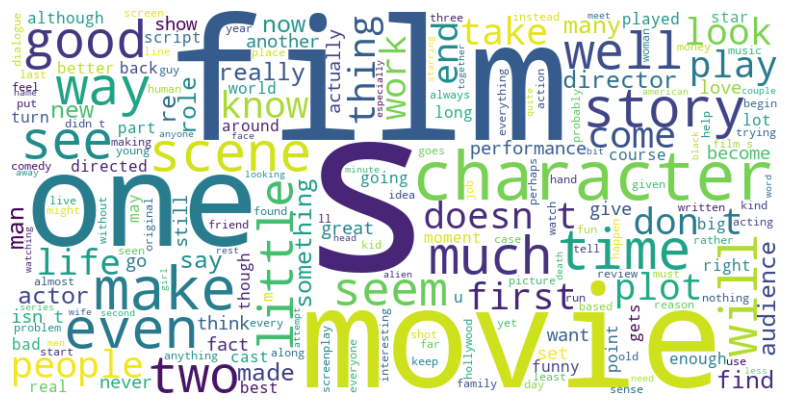

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(all_words))

plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')

In summary, a Word Cloud is a powerful tool for quickly identifying common words in a dataset, making it useful for feature engineering by highlighting frequently occurring terms. It helps detect unwanted noise, such as stopwords, which may need to be removed for better analysis. Additionally, it enables comparison between different text categories, such as positive vs. negative reviews, to uncover distinct patterns. Beyond analysis, Word Clouds are also visually engaging, making them an effective way to present insights in an intuitive and compelling manner.

#### Key Word in Context (KWIC)

Key Word in Context (KWIC) is a text analysis technique used to explore how specific words are used in different sentences or documents. Rather than just counting how many times a word appears, KWIC shows you the *surrounding words*—the immediate context in which the keyword is used.

This is helpful because the meaning of a word often depends on how it’s used. For example, the word *"great"* might usually have a positive meaning, but in the sentence *“not so great”*, the tone changes completely. Seeing the word in context helps us understand its true role in expressing sentiment or opinion.

KWIC is especially useful for:
- *Linguistic analysis* – Understanding how words are used across different texts or categories  
- *Sentiment analysis* – Seeing whether positive or negative words are used sincerely or sarcastically  
- *Exploring word usage patterns* – Identifying differences in tone, emphasis, or writing style

For instance, if we run KWIC on the word *“amazing”*, we might find:
- "... the lead actor gave an [amazing] performance ..."
- "... not as [amazing] as I expected ..."
- "... an [amazing] surprise in the second half ..."

Even though it’s the same word, the meaning can shift depending on what comes before or after it.

This technique is particularly valuable when working with sentiment-labelled text (like reviews), because it helps us examine *how* people use emotionally charged words in different ways. It can also highlight sarcasm, negation, or subtle tone differences that word counts alone would miss.

In short, KWIC turns raw word data into meaningful context—something essential when working with human language:

In [9]:
import re  # Regular expressions for text processing

# Define a function that extracts the keyword in its surrounding context
def kwic(text, keyword, window=5):
    # Use regular expressions to extract words, convert all to lowercase for consistent matching
    words = re.findall(r'\w+', text.lower())

    # Ensure the keyword is also in lowercase to match the processed text
    keyword = keyword.lower()

    # Create an empty list to store the keyword-in-context results
    kwic_results = []

    # Loop through all words and their positions
    for i, word in enumerate(words):
        # When the current word matches the keyword
        if word == keyword:
            # Extract 'window' number of words to the left of the keyword (if available)
            left_context = words[max(0, i - window): i]

            # Extract 'window' number of words to the right of the keyword (if available)
            right_context = words[i + 1: i + 1 + window]

            # Append the result as a tuple: (left context string, keyword, right context string)
            kwic_results.append((" ".join(left_context), word, " ".join(right_context)))

    # Return the full list of keyword-in-context results
    return kwic_results


Let's apply KWIC to our dataset and extract contextual information for a given word, e.g., "great".

In [10]:
# Set the keyword we want to search for in context
keyword = "great"

# Loop through each row in the dataset
for idx, row in data.iterrows():
    
    # Apply the KWIC function to the current review text
    kwic_results = kwic(row['text'], keyword)
    
    # If the keyword appears at least once in the text
    if kwic_results:
        # Print the label of the review (e.g. 'pos' or 'neg')
        print(f"Review Label: {row['label']}")
        
        # Print each instance of the keyword with its surrounding context
        for left, key, right in kwic_results:
            print(f"... {left} [{key}] {right} ...")
        
        # Print a separator line for readability between reviews
        print("-" * 50)

Review Label: pos
... solidifying his mark as a [great] comical actor with this picture ...
--------------------------------------------------
Review Label: pos
... flowing this film has a [great] opening a memorable finale but ...
--------------------------------------------------
Review Label: pos
... famous in his 1971 masterpiece [great] car chase that scene alone ...
--------------------------------------------------
Review Label: pos
... s a character sketch a [great] wall 1986 can be called ...
--------------------------------------------------
Review Label: pos
... to open them what¹s also [great] about the film is its ...
... which gives the film a [great] deal of authenticity and what ...
--------------------------------------------------
Review Label: pos
... for example there s a [great] discussion about lady the tramp ...
--------------------------------------------------
Review Label: pos
... only exception i believe is [great] expectations however i don t ...
... terrifi

If "great" frequently appears in positive reviews, it confirms its role as a positive sentiment word. If "great" appears in negative reviews, we can analyse if it is used sarcastically (e.g., "not so great").

We can compare KWIC results for different words like "bad", "amazing", or "disappointing".

KWIC is a useful text processing technique for exploring sentiment-oriented word usage. By applying it to positive and negative movie reviews, we can gain insights into how words contribute to sentiment expression.

## What have we learnt?

Working with text data requires a thoughtful, step-by-step approach before diving into machine learning. Throughout this section, we’ve explored what it means to *understand*, *visualise*, and *prepare* language datasets—and why each step is so important. Here’s a summary of what we’ve covered:

- *Language data is messy by nature* – Text can be inconsistent, unstructured, and full of noise. Before using it in models, we need to explore and clean it.

- *Descriptive analysis gives structure to unstructured data* – Looking at metadata like text length, token counts, vocabulary size, and class distribution helps us understand what the data looks like and whether it’s suitable for machine learning.

- *Visual tools make patterns easier to spot* – Word frequency analysis, word clouds, and keyword-in-context (KWIC) are simple but powerful ways to explore content, tone, and themes across a dataset.

- *Tokenisation is the foundation of NLP workflows* – Splitting text into smaller units like words or subwords makes it possible to analyse and process language computationally.

- *Transformation turns language into numbers* – Techniques like stopword removal, stemming, lemmatisation, and vectorisation convert raw text into numerical formats that models can understand and learn from.

- *Context matters* – KWIC showed us that understanding how a word is used in its surrounding text can reveal much more than frequency counts alone.

When you apply all of these techniques together, you create a clear, structured path from raw text to model-ready data. This not only improves the performance of machine learning models, but also builds confidence in the results they produce.

Well-prepared language data leads to better insights, fairer models, and more meaningful outcomes.